In [2]:
#Add import statements for external libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Read the CSV file into a pandas dataframe. 

In [5]:
#Reading csv data into a panda's dataframe
bikeData = pd.read_csv("../data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv")

bikeData.head()
bikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56904 entries, 0 to 56903
Data columns (total 3 columns):
Date                            56904 non-null object
Fremont Bridge East Sidewalk    56895 non-null float64
Fremont Bridge West Sidewalk    56895 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.3+ MB


### 2. Add columns to the dataframe containing: ( 3 pt)
- The total (East + West) bicycle count
- The hour of the day
- The year

In [6]:
#adding a total column
bikeData['total'] = bikeData['Fremont Bridge East Sidewalk'] + bikeData['Fremont Bridge West Sidewalk']
bikeData.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,total
0,03/31/2019 11:00:00 PM,6.0,10.0,16.0
1,03/31/2019 10:00:00 PM,7.0,14.0,21.0
2,03/31/2019 09:00:00 PM,18.0,15.0,33.0
3,03/31/2019 08:00:00 PM,26.0,31.0,57.0
4,03/31/2019 07:00:00 PM,30.0,58.0,88.0


In [36]:
#adding an hours column
#convert data to an datetime object
bikeData['Date'] = pd.to_datetime(bikeData['Date'],infer_datetime_format=True)

#creating hours series
hours = bikeData['Date'].apply(lambda x: x.hour)
#adding hours series to the dataframe
bikeData['hours'] = hours

In [39]:
#creating years series
years = bikeData['Date'].apply(lambda x: x.year)

#adding years series to the dataframe
bikeData['years'] = years
bikeData.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,total,hours,years
0,2019-03-31 23:00:00,6.0,10.0,16.0,23,2019
1,2019-03-31 22:00:00,7.0,14.0,21.0,22,2019
2,2019-03-31 21:00:00,18.0,15.0,33.0,21,2019
3,2019-03-31 20:00:00,26.0,31.0,57.0,20,2019
4,2019-03-31 19:00:00,30.0,58.0,88.0,19,2019


### 3. Create a dataframe with the subset of data from the year 2016


In [41]:
bikeData2016 = bikeData[bikeData.years == 2016]


,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,total,hours,years
19680,2016-12-31 23:00:00,4.0,4.0,8.0,23,2016
19681,2016-12-31 22:00:00,7.0,8.0,15.0,22,2016
19682,2016-12-31 21:00:00,4.0,6.0,10.0,21,2016
19683,2016-12-31 20:00:00,3.0,6.0,9.0,20,2016
19684,2016-12-31 19:00:00,6.0,4.0,10.0,19,2016


### 4. Use pandas + matplotlib to plot the counts by hour

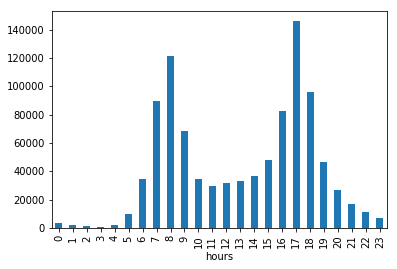

In [48]:
bikeData2016.groupby(bikeData['hours'])['total'].sum().plot(kind="bar")

### 5. Use pandas to determine what is (on average) the busiest hour of the day 

In [58]:
meanHours = bikeData2016.groupby(bikeData['hours'])['total'].mean()

meanHours = meanHours.sort_values(ascending=False)

meanHours.index[0]

17